<a href="https://colab.research.google.com/github/PSLMssGerd44/Works-/blob/main/Malaria_cases_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from scipy.stats import skewtest, levene
from scipy import stats
from scipy import optimize
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_digits
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.datasets import *
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

In [ ]:
!pip install mglearn;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
path="/content/DatasetAfricaMalaria.csv"
data= pd.read_csv(path)
data.head()

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)",...,Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,...,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,...,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,...,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,...,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,...,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)


In [ ]:
data.dtypes

Country Name                                                                                object
Year                                                                                         int64
Country Code                                                                                object
Incidence of malaria (per 1,000 population at risk)                                        float64
Malaria cases reported                                                                     float64
Use of insecticide-treated bed nets (% of under-5 population)                              float64
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    float64
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      float64
People using safely managed drinking water services (% of population)                      float64
People using safely managed drinking water services, rural (% of rural population)         float64
People usi

In [ ]:
data.describe()

,Year,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)","People using safely managed drinking water services, urban (% of urban population)",People using safely managed sanitation services (% of population),...,Urban population (% of total population),Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude
count,594.000000,550.000000,5.500000e+02,132.000000,122.000000,106.000000,99.000000,88.000000,176.000000,132.000000,...,588.000000,588.000000,588.000000,566.000000,566.000000,588.000000,566.000000,566.000000,594.000000,594.000000
mean,2012.000000,190.087491,1.068330e+06,42.530303,30.201639,15.013958,33.478990,12.470568,51.549545,28.768939,...,43.164116,3.523061,65.994915,51.449576,84.268498,39.469796,28.077208,48.088375,2.828796,17.342546
std,3.164943,163.054527,2.192802e+06,20.157059,18.903198,12.389166,26.678321,10.078371,24.157416,18.631510,...,18.086118,1.456244,17.283361,18.927868,9.307285,26.304934,24.046725,21.802128,15.678226,20.041257
min,2007.000000,0.000000,0.000000e+00,1.000000,0.500000,0.000000,5.770000,0.930000,11.200000,6.370000,...,9.860000,-4.650000,28.960000,17.050000,52.010000,4.990000,1.890000,12.580000,-30.559482,-24.013197
25%,2009.000000,30.857500,2.211750e+03,26.675000,17.275000,5.763285,8.975000,4.185000,34.125000,16.532500,...,28.795000,2.512500,52.375000,37.075000,78.080000,18.197500,8.842500,30.775000,-6.369028,0.824782
50%,2012.000000,174.775000,1.130260e+05,42.900000,29.300000,11.500000,28.390000,10.675000,51.365000,25.410000,...,41.560000,3.730000,64.470000,50.435000,85.420000,32.555000,18.815000,44.695000,6.744051,18.611308
75%,2015.000000,347.637500,1.154808e+06,56.325000,42.625000,21.850000,43.890000,16.887500,70.747500,35.725000,...,56.945000,4.450000,79.165000,62.245000,90.082500,54.810000,38.082500,58.845000,12.862807,31.465866
max,2017.000000,585.540000,1.682113e+07,95.500000,76.900000,59.600000,92.660000,39.930000,89.540000,78.120000,...,88.980000,7.400000,99.870000,99.830000,99.920000,100.000000,95.180000,98.300000,33.886917,57.552152


In [ ]:
data.shape

(594, 27)

In [ ]:
data.columns

Index(['Country Name', 'Year', 'Country Code',
       'Incidence of malaria (per 1,000 population at risk)',
       'Malaria cases reported',
       'Use of insecticide-treated bed nets (% of under-5 population)',
       'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
       'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
       'People using safely managed drinking water services (% of population)',
       'People using safely managed drinking water services, rural (% of rural population)',
       'People using safely managed drinking water services, urban (% of urban population)',
       'People using safely managed sanitation services (% of population)',
       'People using safely managed sanitation services, rural (% of rural population)',
       'People using safely managed sanitation services, urban  (% of urban population)',
       'Rural population (% of total population)',
       'Rural popula

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 27 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Country Name                                                                             594 non-null    object 
 1   Year                                                                                     594 non-null    int64  
 2   Country Code                                                                             594 non-null    object 
 3   Incidence of malaria (per 1,000 population at risk)                                      550 non-null    float64
 4   Malaria cases reported                                                                   550 non-null    float64
 5   Use of insecticide-treated bed nets (% of under-5 population)   

In [ ]:
data.isnull()

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)",...,Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
590,False,False,False,True,True,True,True,True,False,True,...,False,False,False,False,False,False,False,False,False,False
591,False,False,False,False,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
592,False,False,False,False,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isnull().sum()

Country Name                                                                                 0
Year                                                                                         0
Country Code                                                                                 0
Incidence of malaria (per 1,000 population at risk)                                         44
Malaria cases reported                                                                      44
Use of insecticide-treated bed nets (% of under-5 population)                              462
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    472
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      488
People using safely managed drinking water services (% of population)                      495
People using safely managed drinking water services, rural (% of rural population)         506
People using safely managed drinking water service

In [ ]:
data.isna().sum()*100/data.shape[0]

Country Name                                                                                0.000000
Year                                                                                        0.000000
Country Code                                                                                0.000000
Incidence of malaria (per 1,000 population at risk)                                         7.407407
Malaria cases reported                                                                      7.407407
Use of insecticide-treated bed nets (% of under-5 population)                              77.777778
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    79.461279
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      82.154882
People using safely managed drinking water services (% of population)                      83.333333
People using safely managed drinking water services, rural (% of rural population)         

In [ ]:
data.drop(['People using safely managed drinking water services (% of population)','People using safely managed drinking water services, rural (% of rural population)','People using safely managed drinking water services, urban (% of urban population)','People using safely managed sanitation services (% of population)','People using safely managed sanitation services, rural (% of rural population)', 'People using safely managed sanitation services, urban  (% of urban population)'], axis=1)

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),Rural population (% of total population),Rural population growth (annual %),...,Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,34.65,-0.60,...,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,42.48,1.91,...,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,58.44,1.99,...,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,42.07,-1.44,...,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,77.00,2.16,...,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Togo,2017,TGO,278.20,1755577.0,69.7,31.1,41.7,58.84,1.58,...,3.79,65.13,48.39,89.06,16.13,7.40,28.61,8.619543,0.824782,POINT (8.619543 0.824782)
590,Tunisia,2017,TUN,NaN,NaN,NaN,NaN,NaN,31.36,0.20,...,1.57,96.25,88.71,99.70,90.92,81.35,95.29,33.886917,9.537499,POINT (33.886917 9.537499)
591,Uganda,2017,UGA,336.76,11667831.0,NaN,NaN,NaN,76.80,3.01,...,6.25,49.10,41.25,75.11,18.47,16.17,26.11,1.373333,32.290275,POINT (1.373333 32.290275)
592,Zambia,2017,ZMB,160.05,5505639.0,NaN,NaN,NaN,57.02,2.01,...,4.21,59.96,41.95,83.86,26.37,18.93,36.24,-13.133897,27.849332,POINT (-13.133897 27.849332)


In [ ]:
data.set_index('Year', inplace=True) 
data.head()

,Country Name,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)","People using safely managed drinking water services, urban (% of urban population)",...,Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
Year,,,,,,,,,,,,,,,,,,,,,
2007,Algeria,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
2007,Angola,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,NaN,...,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2007,Benin,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
2007,Botswana,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,83.96,...,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
2007,Burkina Faso,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,NaN,...,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)


In [ ]:
data.drop(['People using safely managed drinking water services (% of population)'], axis=1)

,Country Name,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),"People using safely managed drinking water services, rural (% of rural population)","People using safely managed drinking water services, urban (% of urban population)",People using safely managed sanitation services (% of population),...,Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
Year,,,,,,,,,,,,,,,,,,,,,
2007,Algeria,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,18.24,...,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
2007,Angola,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,NaN,...,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2007,Benin,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
2007,Botswana,BWA,1.03,390.0,NaN,NaN,NaN,NaN,83.96,NaN,...,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
2007,Burkina Faso,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,NaN,...,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,Togo,TGO,278.20,1755577.0,69.7,31.1,41.7,NaN,NaN,NaN,...,3.79,65.13,48.39,89.06,16.13,7.40,28.61,8.619543,0.824782,POINT (8.619543 0.824782)
2017,Tunisia,TUN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.12,...,1.57,96.25,88.71,99.70,90.92,81.35,95.29,33.886917,9.537499,POINT (33.886917 9.537499)
2017,Uganda,UGA,336.76,11667831.0,NaN,NaN,NaN,4.46,15.70,NaN,...,6.25,49.10,41.25,75.11,18.47,16.17,26.11,1.373333,32.290275,POINT (1.373333 32.290275)


In [ ]:
data.drop(['People using safely managed drinking water services, urban (% of urban population)','People using safely managed sanitation services (% of population)'], axis=1)

,Country Name,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)","People using safely managed sanitation services, rural (% of rural population)",...,Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
Year,,,,,,,,,,,,,,,,,,,,,
2007,Algeria,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,19.96,...,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
2007,Angola,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,NaN,...,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2007,Benin,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
2007,Botswana,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
2007,Burkina Faso,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,NaN,...,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,Togo,TGO,278.20,1755577.0,69.7,31.1,41.7,NaN,NaN,NaN,...,3.79,65.13,48.39,89.06,16.13,7.40,28.61,8.619543,0.824782,POINT (8.619543 0.824782)
2017,Tunisia,TUN,NaN,NaN,NaN,NaN,NaN,92.66,NaN,NaN,...,1.57,96.25,88.71,99.70,90.92,81.35,95.29,33.886917,9.537499,POINT (33.886917 9.537499)
2017,Uganda,UGA,336.76,11667831.0,NaN,NaN,NaN,7.07,4.46,NaN,...,6.25,49.10,41.25,75.11,18.47,16.17,26.11,1.373333,32.290275,POINT (1.373333 32.290275)


In [ ]:
data1=data.drop(['Use of insecticide-treated bed nets (% of under-5 population)','Children with fever receiving antimalarial drugs (% of children under age 5 with fever)','Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)','People using safely managed drinking water services (% of population)'], axis=1)
data1

,Country Name,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,"People using safely managed drinking water services, rural (% of rural population)","People using safely managed drinking water services, urban (% of urban population)",People using safely managed sanitation services (% of population),"People using safely managed sanitation services, rural (% of rural population)","People using safely managed sanitation services, urban (% of urban population)",Rural population (% of total population),...,Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
Year,,,,,,,,,,,,,,,,,,,,,
2007,Algeria,DZA,0.01,26.0,NaN,NaN,18.24,19.96,17.33,34.65,...,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
2007,Angola,AGO,286.72,1533485.0,NaN,NaN,NaN,NaN,NaN,42.48,...,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2007,Benin,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,58.44,...,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
2007,Botswana,BWA,1.03,390.0,NaN,83.96,NaN,NaN,NaN,42.07,...,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
2007,Burkina Faso,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,77.00,...,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,Togo,TGO,278.20,1755577.0,NaN,NaN,NaN,NaN,NaN,58.84,...,3.79,65.13,48.39,89.06,16.13,7.40,28.61,8.619543,0.824782,POINT (8.619543 0.824782)
2017,Tunisia,TUN,NaN,NaN,NaN,NaN,78.12,NaN,88.29,31.36,...,1.57,96.25,88.71,99.70,90.92,81.35,95.29,33.886917,9.537499,POINT (33.886917 9.537499)
2017,Uganda,UGA,336.76,11667831.0,4.46,15.70,NaN,NaN,NaN,76.80,...,6.25,49.10,41.25,75.11,18.47,16.17,26.11,1.373333,32.290275,POINT (1.373333 32.290275)


In [ ]:
data2=data1.drop(['People using safely managed drinking water services, rural (% of rural population)'], axis=1)
data2

,Country Name,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,"People using safely managed drinking water services, urban (% of urban population)",People using safely managed sanitation services (% of population),"People using safely managed sanitation services, rural (% of rural population)","People using safely managed sanitation services, urban (% of urban population)",Rural population (% of total population),Rural population growth (annual %),...,Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
Year,,,,,,,,,,,,,,,,,,,,,
2007,Algeria,DZA,0.01,26.0,NaN,18.24,19.96,17.33,34.65,-0.60,...,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
2007,Angola,AGO,286.72,1533485.0,NaN,NaN,NaN,NaN,42.48,1.91,...,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2007,Benin,BEN,480.24,0.0,NaN,NaN,NaN,NaN,58.44,1.99,...,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
2007,Botswana,BWA,1.03,390.0,83.96,NaN,NaN,NaN,42.07,-1.44,...,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
2007,Burkina Faso,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,77.00,2.16,...,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,Togo,TGO,278.20,1755577.0,NaN,NaN,NaN,NaN,58.84,1.58,...,3.79,65.13,48.39,89.06,16.13,7.40,28.61,8.619543,0.824782,POINT (8.619543 0.824782)
2017,Tunisia,TUN,NaN,NaN,NaN,78.12,NaN,88.29,31.36,0.20,...,1.57,96.25,88.71,99.70,90.92,81.35,95.29,33.886917,9.537499,POINT (33.886917 9.537499)
2017,Uganda,UGA,336.76,11667831.0,15.70,NaN,NaN,NaN,76.80,3.01,...,6.25,49.10,41.25,75.11,18.47,16.17,26.11,1.373333,32.290275,POINT (1.373333 32.290275)


In [ ]:
data3=data2.drop(['People using safely managed drinking water services, urban (% of urban population)','People using safely managed sanitation services (% of population)'],axis=1)
data3

,Country Name,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,"People using safely managed sanitation services, rural (% of rural population)","People using safely managed sanitation services, urban (% of urban population)",Rural population (% of total population),Rural population growth (annual %),Urban population (% of total population),Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
Year,,,,,,,,,,,,,,,,,,,
2007,Algeria,DZA,0.01,26.0,19.96,17.33,34.65,-0.60,65.35,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
2007,Angola,AGO,286.72,1533485.0,NaN,NaN,42.48,1.91,57.52,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2007,Benin,BEN,480.24,0.0,NaN,NaN,58.44,1.99,41.56,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
2007,Botswana,BWA,1.03,390.0,NaN,NaN,42.07,-1.44,57.93,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
2007,Burkina Faso,BFA,503.80,44246.0,NaN,NaN,77.00,2.16,23.00,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,Togo,TGO,278.20,1755577.0,NaN,NaN,58.84,1.58,41.16,3.79,65.13,48.39,89.06,16.13,7.40,28.61,8.619543,0.824782,POINT (8.619543 0.824782)
2017,Tunisia,TUN,NaN,NaN,NaN,88.29,31.36,0.20,68.64,1.57,96.25,88.71,99.70,90.92,81.35,95.29,33.886917,9.537499,POINT (33.886917 9.537499)
2017,Uganda,UGA,336.76,11667831.0,NaN,NaN,76.80,3.01,23.20,6.25,49.10,41.25,75.11,18.47,16.17,26.11,1.373333,32.290275,POINT (1.373333 32.290275)


In [ ]:
data4=data3.drop(['People using safely managed sanitation services, rural (% of rural population)'],axis=1)
data4

,Country Name,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,"People using safely managed sanitation services, urban (% of urban population)",Rural population (% of total population),Rural population growth (annual %),Urban population (% of total population),Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
Year,,,,,,,,,,,,,,,,,,
2007,Algeria,DZA,0.01,26.0,17.33,34.65,-0.60,65.35,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
2007,Angola,AGO,286.72,1533485.0,NaN,42.48,1.91,57.52,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2007,Benin,BEN,480.24,0.0,NaN,58.44,1.99,41.56,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
2007,Botswana,BWA,1.03,390.0,NaN,42.07,-1.44,57.93,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
2007,Burkina Faso,BFA,503.80,44246.0,NaN,77.00,2.16,23.00,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,Togo,TGO,278.20,1755577.0,NaN,58.84,1.58,41.16,3.79,65.13,48.39,89.06,16.13,7.40,28.61,8.619543,0.824782,POINT (8.619543 0.824782)
2017,Tunisia,TUN,NaN,NaN,88.29,31.36,0.20,68.64,1.57,96.25,88.71,99.70,90.92,81.35,95.29,33.886917,9.537499,POINT (33.886917 9.537499)
2017,Uganda,UGA,336.76,11667831.0,NaN,76.80,3.01,23.20,6.25,49.10,41.25,75.11,18.47,16.17,26.11,1.373333,32.290275,POINT (1.373333 32.290275)


In [ ]:
data5=data4.drop(['People using safely managed sanitation services, urban  (% of urban population)'],axis=1)
data5

,Country Name,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Rural population (% of total population),Rural population growth (annual %),Urban population (% of total population),Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
Year,,,,,,,,,,,,,,,,,
2007,Algeria,DZA,0.01,26.0,34.65,-0.60,65.35,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
2007,Angola,AGO,286.72,1533485.0,42.48,1.91,57.52,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2007,Benin,BEN,480.24,0.0,58.44,1.99,41.56,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
2007,Botswana,BWA,1.03,390.0,42.07,-1.44,57.93,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
2007,Burkina Faso,BFA,503.80,44246.0,77.00,2.16,23.00,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,Togo,TGO,278.20,1755577.0,58.84,1.58,41.16,3.79,65.13,48.39,89.06,16.13,7.40,28.61,8.619543,0.824782,POINT (8.619543 0.824782)
2017,Tunisia,TUN,NaN,NaN,31.36,0.20,68.64,1.57,96.25,88.71,99.70,90.92,81.35,95.29,33.886917,9.537499,POINT (33.886917 9.537499)
2017,Uganda,UGA,336.76,11667831.0,76.80,3.01,23.20,6.25,49.10,41.25,75.11,18.47,16.17,26.11,1.373333,32.290275,POINT (1.373333 32.290275)


In [ ]:
df=data5
df

,Country Name,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Rural population (% of total population),Rural population growth (annual %),Urban population (% of total population),Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
Year,,,,,,,,,,,,,,,,,
2007,Algeria,DZA,0.01,26.0,34.65,-0.60,65.35,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
2007,Angola,AGO,286.72,1533485.0,42.48,1.91,57.52,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2007,Benin,BEN,480.24,0.0,58.44,1.99,41.56,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
2007,Botswana,BWA,1.03,390.0,42.07,-1.44,57.93,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
2007,Burkina Faso,BFA,503.80,44246.0,77.00,2.16,23.00,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,Togo,TGO,278.20,1755577.0,58.84,1.58,41.16,3.79,65.13,48.39,89.06,16.13,7.40,28.61,8.619543,0.824782,POINT (8.619543 0.824782)
2017,Tunisia,TUN,NaN,NaN,31.36,0.20,68.64,1.57,96.25,88.71,99.70,90.92,81.35,95.29,33.886917,9.537499,POINT (33.886917 9.537499)
2017,Uganda,UGA,336.76,11667831.0,76.80,3.01,23.20,6.25,49.10,41.25,75.11,18.47,16.17,26.11,1.373333,32.290275,POINT (1.373333 32.290275)


In [ ]:
df.describe()

,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Rural population (% of total population),Rural population growth (annual %),Urban population (% of total population),Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude
count,550.000000,5.500000e+02,588.000000,588.000000,588.000000,588.000000,588.000000,566.000000,566.000000,588.000000,566.000000,566.000000,594.000000,594.000000
mean,190.087491,1.068330e+06,56.836650,1.389371,43.164116,3.523061,65.994915,51.449576,84.268498,39.469796,28.077208,48.088375,2.828796,17.342546
std,163.054527,2.192802e+06,18.086328,1.199693,18.086118,1.456244,17.283361,18.927868,9.307285,26.304934,24.046725,21.802128,15.678226,20.041257
min,0.000000,0.000000e+00,11.020000,-3.450000,9.860000,-4.650000,28.960000,17.050000,52.010000,4.990000,1.890000,12.580000,-30.559482,-24.013197
25%,30.857500,2.211750e+03,43.057500,0.410000,28.795000,2.512500,52.375000,37.075000,78.080000,18.197500,8.842500,30.775000,-6.369028,0.824782
50%,174.775000,1.130260e+05,58.445000,1.675000,41.560000,3.730000,64.470000,50.435000,85.420000,32.555000,18.815000,44.695000,6.744051,18.611308
75%,347.637500,1.154808e+06,71.205000,2.130000,56.945000,4.450000,79.165000,62.245000,90.082500,54.810000,38.082500,58.845000,12.862807,31.465866
max,585.540000,1.682113e+07,90.140000,7.090000,88.980000,7.400000,99.870000,99.830000,99.920000,100.000000,95.180000,98.300000,33.886917,57.552152


In [ ]:
df1=df.drop(['Rural population (% of total population)','Rural population growth (annual %)','Urban population (% of total population)','Urban population growth (annual %)'],axis=1)
df1

,Country Name,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
Year,,,,,,,,,,,,,
2007,Algeria,DZA,0.01,26.0,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
2007,Angola,AGO,286.72,1533485.0,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2007,Benin,BEN,480.24,0.0,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
2007,Botswana,BWA,1.03,390.0,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
2007,Burkina Faso,BFA,503.80,44246.0,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,Togo,TGO,278.20,1755577.0,65.13,48.39,89.06,16.13,7.40,28.61,8.619543,0.824782,POINT (8.619543 0.824782)
2017,Tunisia,TUN,NaN,NaN,96.25,88.71,99.70,90.92,81.35,95.29,33.886917,9.537499,POINT (33.886917 9.537499)
2017,Uganda,UGA,336.76,11667831.0,49.10,41.25,75.11,18.47,16.17,26.11,1.373333,32.290275,POINT (1.373333 32.290275)


In [ ]:
df2=df1.drop(['People using at least basic sanitation services, rural (% of rural population)','People using at least basic drinking water services, rural (% of rural population)','People using at least basic drinking water services, urban (% of urban population)'],axis=1)
df2

,Country Name,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),"People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
Year,,,,,,,,,,
2007,Algeria,DZA,0.01,26.0,91.68,85.85,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
2007,Angola,AGO,286.72,1533485.0,47.96,37.26,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2007,Benin,BEN,480.24,0.0,63.78,11.80,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
2007,Botswana,BWA,1.03,390.0,78.89,61.60,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
2007,Burkina Faso,BFA,503.80,44246.0,52.27,15.60,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)
...,...,...,...,...,...,...,...,...,...,...
2017,Togo,TGO,278.20,1755577.0,65.13,16.13,28.61,8.619543,0.824782,POINT (8.619543 0.824782)
2017,Tunisia,TUN,NaN,NaN,96.25,90.92,95.29,33.886917,9.537499,POINT (33.886917 9.537499)
2017,Uganda,UGA,336.76,11667831.0,49.10,18.47,26.11,1.373333,32.290275,POINT (1.373333 32.290275)


In [ ]:
df3=df2.drop(['People using at least basic sanitation services, urban  (% of urban population)','latitude','longitude','geometry'],axis=1)
df3

,Country Name,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population)
Year,,,,,,
2007,Algeria,DZA,0.01,26.0,91.68,85.85
2007,Angola,AGO,286.72,1533485.0,47.96,37.26
2007,Benin,BEN,480.24,0.0,63.78,11.80
2007,Botswana,BWA,1.03,390.0,78.89,61.60
2007,Burkina Faso,BFA,503.80,44246.0,52.27,15.60
...,...,...,...,...,...,...
2017,Togo,TGO,278.20,1755577.0,65.13,16.13
2017,Tunisia,TUN,NaN,NaN,96.25,90.92
2017,Uganda,UGA,336.76,11667831.0,49.10,18.47


In [ ]:
df3

,Country Name,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population)
Year,,,,,,
2007,Algeria,DZA,0.01,26.0,91.68,85.85
2007,Angola,AGO,286.72,1533485.0,47.96,37.26
2007,Benin,BEN,480.24,0.0,63.78,11.80
2007,Botswana,BWA,1.03,390.0,78.89,61.60
2007,Burkina Faso,BFA,503.80,44246.0,52.27,15.60
...,...,...,...,...,...,...
2017,Togo,TGO,278.20,1755577.0,65.13,16.13
2017,Tunisia,TUN,NaN,NaN,96.25,90.92
2017,Uganda,UGA,336.76,11667831.0,49.10,18.47


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
df3.reset_index()

,Year,Country Name,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population)
0,2007,Algeria,DZA,0.01,26.0,91.68,85.85
1,2007,Angola,AGO,286.72,1533485.0,47.96,37.26
2,2007,Benin,BEN,480.24,0.0,63.78,11.80
3,2007,Botswana,BWA,1.03,390.0,78.89,61.60
4,2007,Burkina Faso,BFA,503.80,44246.0,52.27,15.60
...,...,...,...,...,...,...,...
589,2017,Togo,TGO,278.20,1755577.0,65.13,16.13
590,2017,Tunisia,TUN,NaN,NaN,96.25,90.92
591,2017,Uganda,UGA,336.76,11667831.0,49.10,18.47
592,2017,Zambia,ZMB,160.05,5505639.0,59.96,26.37


In [ ]:
X = df3['Year '].values.reshape(-1,1)

KeyError: ignored

In [ ]:
def clean_dataset(df3):
    assert isinstance(df3, pd.DataFrame), 
    df3.dropna(inplace=True)
    indices_to_keep = ~df3.isin([np.nan, np.inf, -np.inf]).any(1)
    return df3[indices_to_keep].astype(np.float64)

In [ ]:
df3.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
df3.dtypes

Country Name                                                              object
Country Code                                                              object
Incidence of malaria (per 1,000 population at risk)                      float64
Malaria cases reported                                                   float64
People using at least basic drinking water services (% of population)    float64
People using at least basic sanitation services (% of population)        float64
dtype: object

In [ ]:
df3.dropna()

,Country Name,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population)
Year,,,,,,
2007,Algeria,DZA,0.01,26.0,91.68,85.85
2007,Angola,AGO,286.72,1533485.0,47.96,37.26
2007,Benin,BEN,480.24,0.0,63.78,11.80
2007,Botswana,BWA,1.03,390.0,78.89,61.60
2007,Burkina Faso,BFA,503.80,44246.0,52.27,15.60
...,...,...,...,...,...,...
2017,Tanzania,TZA,123.96,5354819.0,56.73,29.91
2017,Togo,TGO,278.20,1755577.0,65.13,16.13
2017,Uganda,UGA,336.76,11667831.0,49.10,18.47


In [ ]:
df3.isna().sum()*100/data.shape[0]

Country Name                                                             0.000000
Country Code                                                             0.000000
Incidence of malaria (per 1,000 population at risk)                      7.407407
Malaria cases reported                                                   7.407407
People using at least basic drinking water services (% of population)    1.010101
People using at least basic sanitation services (% of population)        1.010101
dtype: float64

In [ ]:
df3['Malaria cases reported'].dropna()

Year
2007          26.0
2007     1533485.0
2007           0.0
2007         390.0
2007       44246.0
           ...    
2017     5354819.0
2017     1755577.0
2017    11667831.0
2017     5505639.0
2017      467508.0
Name: Malaria cases reported, Length: 550, dtype: float64

In [ ]:
df3.dropna(how='all')

,Country Name,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population)
Year,,,,,,
2007,Algeria,DZA,0.01,26.0,91.68,85.85
2007,Angola,AGO,286.72,1533485.0,47.96,37.26
2007,Benin,BEN,480.24,0.0,63.78,11.80
2007,Botswana,BWA,1.03,390.0,78.89,61.60
2007,Burkina Faso,BFA,503.80,44246.0,52.27,15.60
...,...,...,...,...,...,...
2017,Togo,TGO,278.20,1755577.0,65.13,16.13
2017,Tunisia,TUN,NaN,NaN,96.25,90.92
2017,Uganda,UGA,336.76,11667831.0,49.10,18.47


In [ ]:
dff=df3.reset_index()
dff

,Year,Country Name,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population)
0,2007,Algeria,DZA,0.01,26.0,91.68,85.85
1,2007,Angola,AGO,286.72,1533485.0,47.96,37.26
2,2007,Benin,BEN,480.24,0.0,63.78,11.80
3,2007,Botswana,BWA,1.03,390.0,78.89,61.60
4,2007,Burkina Faso,BFA,503.80,44246.0,52.27,15.60
...,...,...,...,...,...,...,...
589,2017,Togo,TGO,278.20,1755577.0,65.13,16.13
590,2017,Tunisia,TUN,NaN,NaN,96.25,90.92
591,2017,Uganda,UGA,336.76,11667831.0,49.10,18.47
592,2017,Zambia,ZMB,160.05,5505639.0,59.96,26.37


In [ ]:
dff.fillna(0)

,Year,Country Name,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population)
0,2007,Algeria,DZA,0.01,26.0,91.68,85.85
1,2007,Angola,AGO,286.72,1533485.0,47.96,37.26
2,2007,Benin,BEN,480.24,0.0,63.78,11.80
3,2007,Botswana,BWA,1.03,390.0,78.89,61.60
4,2007,Burkina Faso,BFA,503.80,44246.0,52.27,15.60
...,...,...,...,...,...,...,...
589,2017,Togo,TGO,278.20,1755577.0,65.13,16.13
590,2017,Tunisia,TUN,0.00,0.0,96.25,90.92
591,2017,Uganda,UGA,336.76,11667831.0,49.10,18.47
592,2017,Zambia,ZMB,160.05,5505639.0,59.96,26.37


In [ ]:
dff.replace([np.inf, -np.inf], np.nan, inplace=True) 


In [ ]:
dff.fillna(0, inplace=True)

In [ ]:
dff.isna()

,Year,Country Name,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population)
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
589,False,False,False,False,False,False,False
590,False,False,False,False,False,False,False
591,False,False,False,False,False,False,False
592,False,False,False,False,False,False,False


In [ ]:
dff.isna().sum()*100/data.shape[0]

Year                                                                     0.0
Country Name                                                             0.0
Country Code                                                             0.0
Incidence of malaria (per 1,000 population at risk)                      0.0
Malaria cases reported                                                   0.0
People using at least basic drinking water services (% of population)    0.0
People using at least basic sanitation services (% of population)        0.0
dtype: float64

In [ ]:
dff.describe()

,Year,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population)
count,594.000000,594.000000,5.940000e+02,594.000000,594.000000
mean,2012.000000,176.006936,9.891945e+05,65.328300,39.071111
std,3.164943,164.610210,2.128383e+06,18.420489,26.467937
min,2007.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,2009.000000,6.950000,3.080000e+02,51.972500,18.032500
50%,2012.000000,127.355000,5.258350e+04,64.195000,32.365000
75%,2015.000000,337.367500,1.041084e+06,78.942500,54.515000
max,2017.000000,585.540000,1.682113e+07,99.870000,100.000000


In [ ]:
X = dff['Year'].values.reshape(-1,1)

In [ ]:
y = dff['Malaria cases reported'].values.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [ ]:
linear = LinearRegression(normalize=True)
linear.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [ ]:
y_pred = linear.predict(X_test)

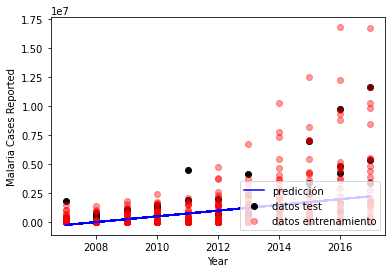

In [ ]:
plt.scatter(X_test, y_test,  color='black',label=r'datos test')
plt.scatter(X_train, y_train,  color='red',alpha=0.4,label=r'datos entrenamiento')
plt.plot(X_test, y_pred, color='blue',label=r'predicción')
plt.legend(loc='lower right')
plt.xlabel(r'Year')
plt.ylabel(r'Malaria Cases Reported')
plt.show()

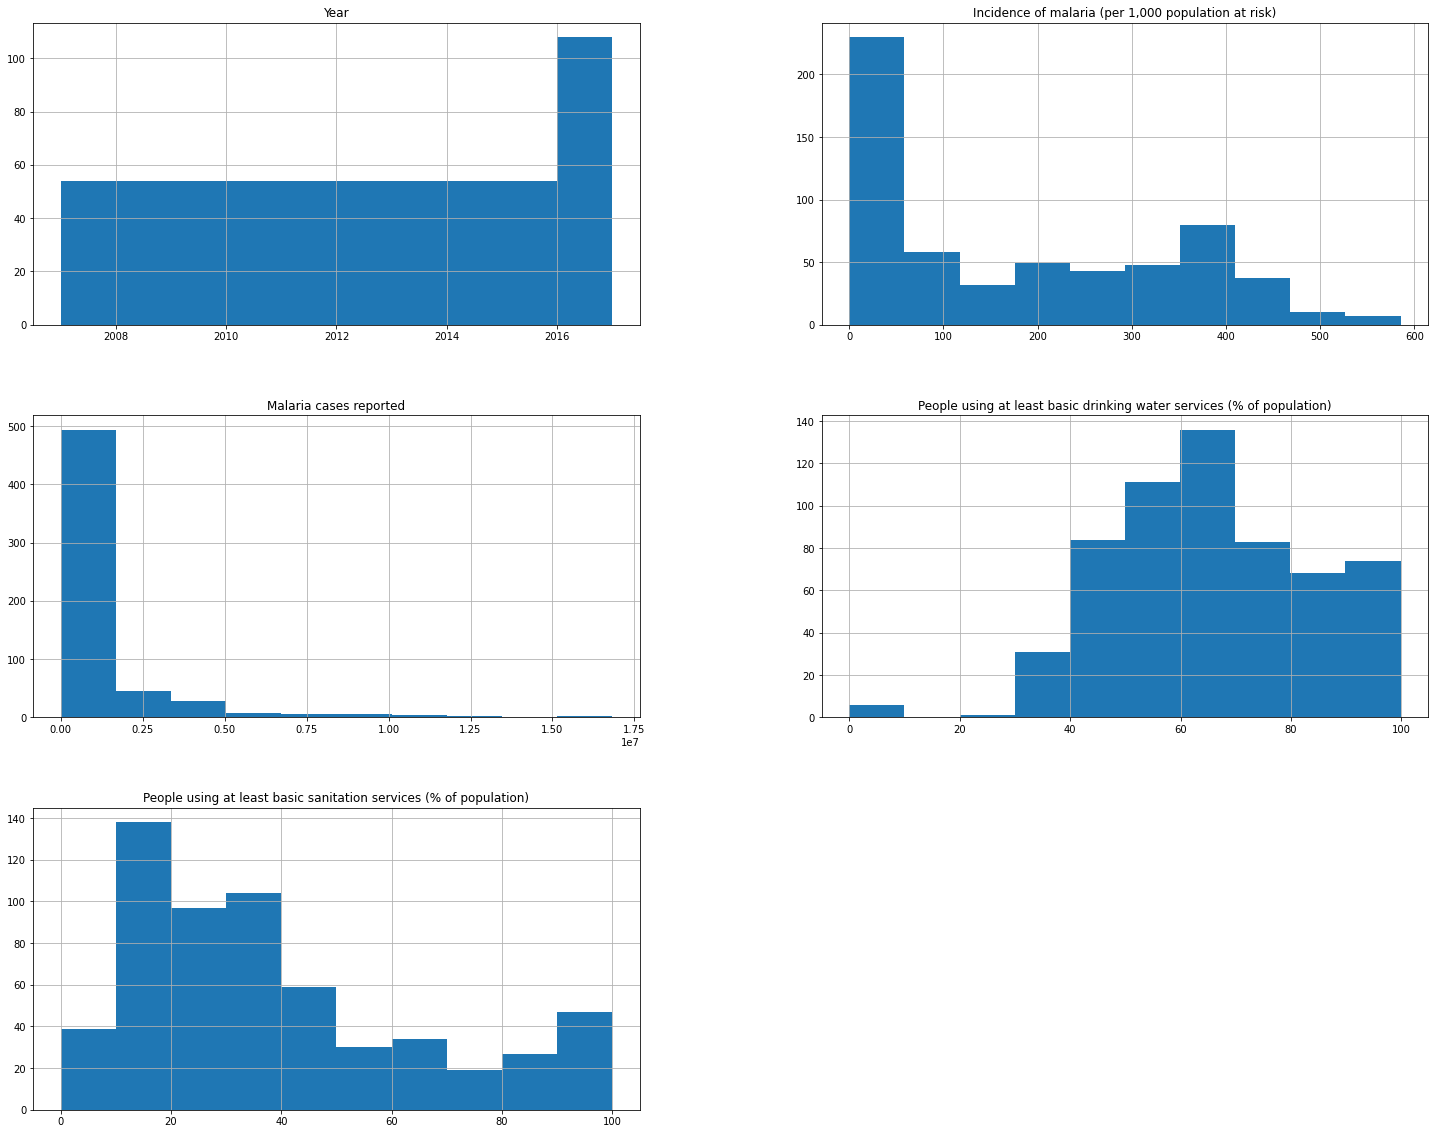

In [ ]:
dff.hist(figsize=(25,20))
plt.show()

In [ ]:
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  1099705.3178412023
MSE:  2892683454141.2554
RMSE:  1700789.0680920004


In [ ]:
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred)/y_test.mean())
print('MSE: ', metrics.mean_squared_error(y_test, y_pred)/y_test.mean()**2)
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred))/y_test.mean())

MAE:  1.4233773888949104
MSE:  4.846055528828671
RMSE:  2.201375826347848


In [ ]:
y_test_sel = y_test[:,0]
y_pred_sel = y_pred[:,0]
y_pred_sel = y_pred_sel[y_test_sel<20000]
y_test_sel = y_test_sel[y_test_sel<20000]

In [ ]:
print('MAE: ', metrics.mean_absolute_error(y_test_sel, y_pred_sel)/y_test.mean())
print('MSE: ', metrics.mean_squared_error(y_test_sel, y_pred_sel))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test_sel, y_pred_sel))/y_test.mean())

MAE:  1.174379849522953
MSE:  1310881761791.3728
RMSE:  1.4819225204792899


In [ ]:
print('R2: ', metrics.r2_score(y_test, y_pred)) #coeficiente de correlación

R2:  0.10740532145371251


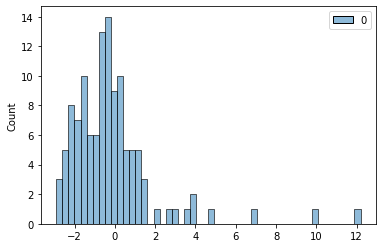

In [ ]:
sns.histplot((y_test - y_pred)/y_test.mean(), bins = 50)
plt.show()

In [ ]:
aX = dff['People using at least basic sanitation services (% of population)'].values.reshape(-1,1)
ay = dff['Malaria cases reported'].values.reshape(-1,1)

In [ ]:
aX_train, aX_test, ay_train, ay_test = train_test_split(aX,ay,test_size=0.2,random_state=3)

In [ ]:
linear = LinearRegression(normalize=True)
linear.fit(aX_train,ay_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [ ]:
ay_pred = linear.predict(aX_test)

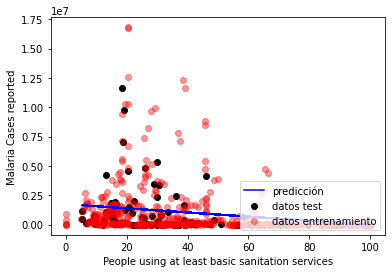

In [ ]:
plt.scatter(aX_test, ay_test,  color='black',label=r'datos test')
plt.scatter(aX_train, ay_train,  color='red',alpha=0.4,label=r'datos entrenamiento')
plt.plot(aX_test, ay_pred, color='blue',label=r'predicción')
plt.legend(loc='lower right')
plt.xlabel(r'People using at least basic sanitation services')
plt.ylabel(r'Malaria Cases reported')
plt.show()

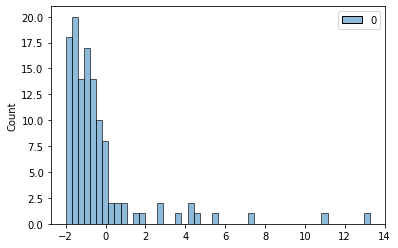

In [ ]:
sns.histplot((ay_test - ay_pred)/ay_test.mean(), bins = 50)
plt.show()

In [ ]:
print('R2: ', metrics.r2_score(ay_test, ay_pred))

R2:  0.042323615242076285


In [ ]:
grid=[{'alpha':[0.01,0.1,1,10,100,1000]}]
gsearch=GridSearchCV(Ridge(),grid,scoring='r2',cv=5)
gsearch.fit(aX_train,ay_train)
print("Best Params",gsearch.best_params_)
print("Score train (best model):",gsearch.best_score_)
print("Score test (best model):",gsearch.score(aX_test,ay_test))

Best Params {'alpha': 1000}
Score train (best model): 0.031179882576088856
Score test (best model): 0.04231571492606756


In [ ]:
dff.columns

Index(['Year', 'Country Name', 'Country Code',
       'Incidence of malaria (per 1,000 population at risk)',
       'Malaria cases reported',
       'People using at least basic drinking water services (% of population)',
       'People using at least basic sanitation services (% of population)'],
      dtype='object')

In [ ]:
bX = dff['People using at least basic drinking water services (% of population)'].values.reshape(-1,1)
by = dff['Malaria cases reported'].values.reshape(-1,1)

In [ ]:
bX_train, bX_test, by_train, by_test = train_test_split(bX,by,test_size=0.2,random_state=3)

In [ ]:
linear = LinearRegression(normalize=True)
linear.fit(bX_train,by_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [ ]:
by_pred = linear.predict(bX_test)

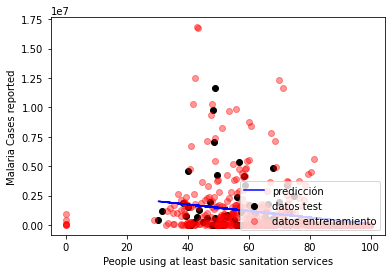

In [ ]:
plt.scatter(bX_test, by_test,  color='black',label=r'datos test')
plt.scatter(bX_train, by_train,  color='red',alpha=0.4,label=r'datos entrenamiento')
plt.plot(bX_test, by_pred, color='blue',label=r'predicción')
plt.legend(loc='lower right')
plt.xlabel(r'People using at least basic sanitation services')
plt.ylabel(r'Malaria Cases reported')
plt.show()

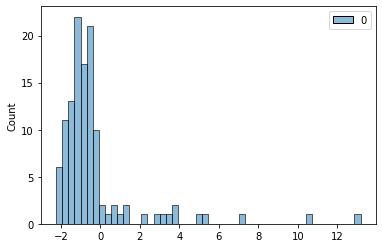

In [ ]:
sns.histplot((by_test - by_pred)/by_test.mean(), bins = 50)
plt.show()

In [ ]:
print('R2: ', metrics.r2_score(ay_test, ay_pred))

R2:  0.042323615242076285


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


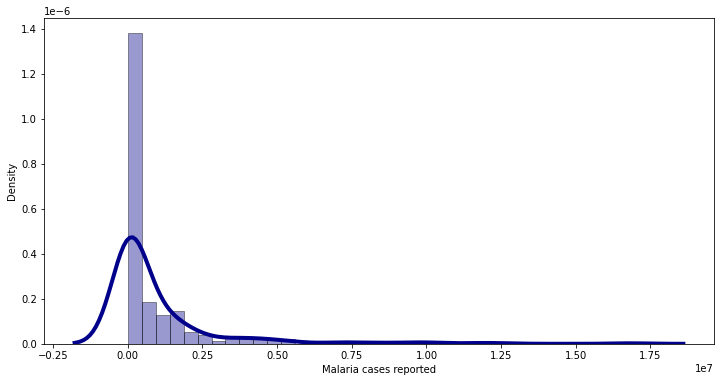

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(dff['Malaria cases reported'], hist=True, kde=True,
             bins=int(180/5),color='darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth':4})

In [ ]:
cX=dff.drop(['Incidence of malaria (per 1,000 population at risk)','People using at least basic sanitation services (% of population)','Country Name', 'Country Code'], axis=1)
cy=dff['Malaria cases reported']

In [ ]:
cX_train,cX_test,cy_train,cy_test=train_test_split(cX,cy,test_size=0.2,random_state=42)

In [ ]:
lr=LinearRegression()

In [ ]:
model=lr.fit(cX_train,cy_train)

In [ ]:
predictions=model.predict(cX_test)

In [ ]:
model.score(cX_test,cy_test)

1.0

In [ ]:
cy_train[:4]

155    711462.0
550      3230.0
132     11757.0
450       157.0
Name: Malaria cases reported, dtype: float64

In [ ]:
model.predict(cX_test[:4])

array([ 2.77844509e-11,  4.02900000e+05, -5.64062284e-10, -5.14648413e-10])

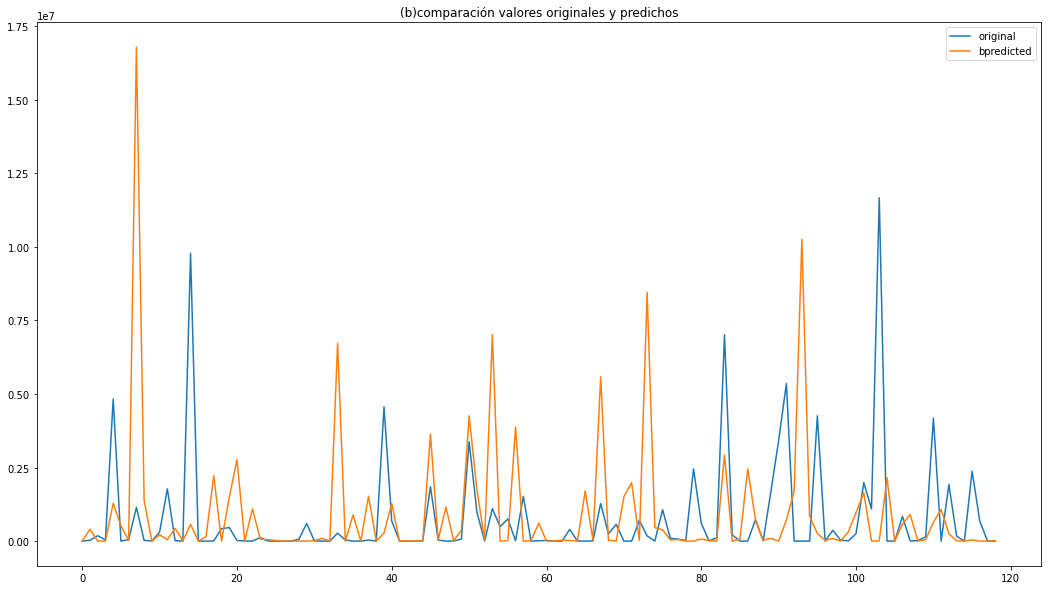

In [ ]:
plt.figure(figsize=(18,10))
cx_cx = range(len(y_test))
plt.plot(cx_cx,y_test,label="original")
plt.plot(cx_cx,predictions,label="bpredicted")
plt.title("(b)comparación valores originales y predichos")
plt.legend()
plt.show()